Loading 0
Loading 1
Loading 2
Loading 3
Loading 4
Loading 5
Loading 6
Loading 7
Loading 8
Loading 9
Loading 0
Loading 1
Loading 2
Loading 3
Loading 4
Loading 5
Loading 6
Loading 7
Loading 8
Loading 9
Epoch 1/10
32/32 [==============================] - 1s 10ms/step - loss: 111.0027 - accuracy: 0.4750 - val_loss: 67.6944 - val_accuracy: 0.5955
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 19.7782 - accuracy: 0.8280 - val_loss: 26.4992 - val_accuracy: 0.8034
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 12.5170 - accuracy: 0.8800 - val_loss: 26.1839 - val_accuracy: 0.7865
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 7.6201 - accuracy: 0.9240 - val_loss: 18.4447 - val_accuracy: 0.8427
Epoch 5/10
32/32 [==============================] - 0s 11ms/step - loss: 5.6340 - accuracy: 0.9190 - val_loss: 19.4063 - val_accuracy: 0.8258
Epoch 6/10
32/32 [==============================] - 0s 12ms/step - loss: 4.1458 - accurac

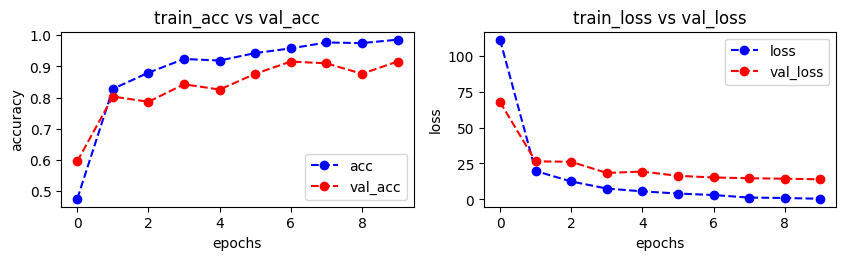

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


import os
import cv2
from keras.layers import Dense, Flatten



####### Training Path to your image folders
train_path = 'train/'
val_path = 'val/'


# If we choose an image size that is too small, our model will not be able to pick up on the distinctive features that help with image recognition.

# Conversely, if our images are too big, it increases the computational resources required by our computer and
# our model might not be sophisticated enough to process them

# As Current training Image dimension is 32 by 32 
imageSize = (32, 32)

# Create empty lists for the Train images and  Train labels
train_Images = []
train_numberLabels = []

# Create empty lists for the Test images and  Test labels
test_Images = []
test_numberLabels = []

def plot_accuracy_loss(history):

  # Plot the accuracy and the loss during the training of the nn.
  fig = plt.figure(figsize=(10,5))
  # Plot accuracy
  plt.subplot(221)

  plt.plot(history.history['accuracy'],'bo--',label= "acc")

  plt.plot(history.history['val_accuracy'],'ro--',label= "val_acc")

  plt.title("train_acc vs val_acc")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()
 

  # PLot Loss functton
  plt.subplot(222)
  plt.plot(history.history['loss'],'bo--',label= "loss")

  plt.plot(history.history['val_loss'],'ro--',label= "val_loss")

  plt.title("train_loss vs val_loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()

def load_data(sourcePath = '',labelArray = [],imageArray = []) :

  # Loop over each folder from '0' to '9'
  for numberLabel in range(10):
    number_folder = os.path.join(sourcePath, str(numberLabel))
    # Loop over each image in the folder
    print("Loading",format(numberLabel)) 
    for file in os.listdir(number_folder):
      file_path = os.path.join(number_folder, file)
      if file_path.endswith(('.tiff','.bmp')):
        # read the image i graay scale and resize it to the imageSize size
        img = cv2.imread(file_path, 0)
        img = cv2.resize(img, imageSize)
        # Append the image and label to the lists
        imageArray.append(img)
        labelArray.append(numberLabel)

# Loading Traiing dataset
load_data(train_path,train_numberLabels,train_Images)

# Convert the lists to NumPy arrays
train_Images = np.array(train_Images)
train_numberLabels = np.array(train_numberLabels)

# Save the arrays in NumPy format
np.save('image_train.npy', train_Images)
np.save('label_train.npy', train_numberLabels)


image_train = np.load('image_train.npy')
label_train = np.load('label_train.npy')


# Loading Testing dataset
load_data(val_path,test_numberLabels,test_Images)


# Convert the lists to NumPy arrays
test_Images = np.array(test_Images)
test_numberLabels = np.array(test_numberLabels)

# Save the arrays in NumPy format
np.save('image_test.npy', test_Images)
np.save('label_test.npy', test_numberLabels)


image_test = np.load('image_test.npy')
label_test = np.load('label_test.npy')


model = keras.Sequential([
keras.layers.Flatten(),
keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])


# compile the nn
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )



# train the model
# some 10 iterations done here
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history1 = model.fit(image_train, label_train,epochs= 10, validation_data=(image_test, label_test),callbacks=[early_stopping_callback])
# history1 = model.fit(image_train, label_train,epochs= 10, validation_data=(image_test, label_test))
plot_accuracy_loss(history1)





Epoch 1/20
32/32 [==============================] - 3s 19ms/step - loss: 0.4561 - accuracy: 0.8700 - val_loss: 2.4039 - val_accuracy: 0.1011
Epoch 2/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0948 - accuracy: 0.9820 - val_loss: 2.2307 - val_accuracy: 0.1966
Epoch 3/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0496 - accuracy: 0.9930 - val_loss: 2.0113 - val_accuracy: 0.2191
Epoch 4/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0302 - accuracy: 0.9990 - val_loss: 1.7430 - val_accuracy: 0.4663
Epoch 5/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 1.4403 - val_accuracy: 0.7135
Epoch 6/20
32/32 [==============================] - 1s 17ms/step - loss: 0.0149 - accuracy: 0.9980 - val_loss: 1.1524 - val_accuracy: 0.8315
Epoch 7/20
32/32 [==============================] - 1s 33ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.7951 - val_accuracy: 0.9438
Epoch 8/20
32

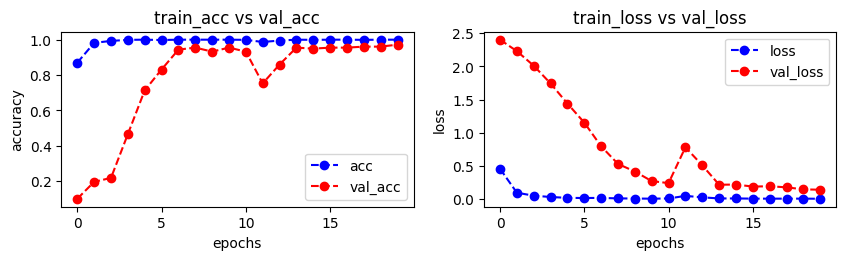

6/6 [==============================] - 0s 3ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


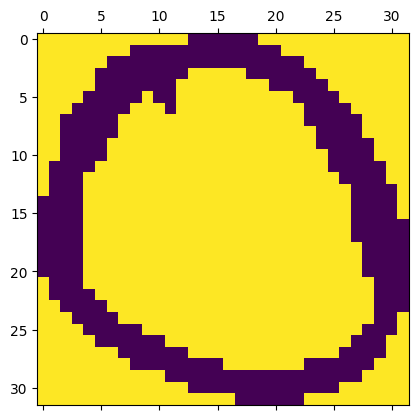

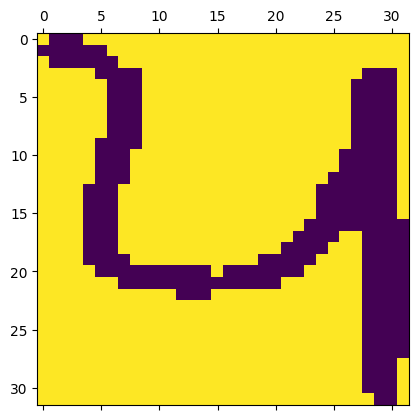

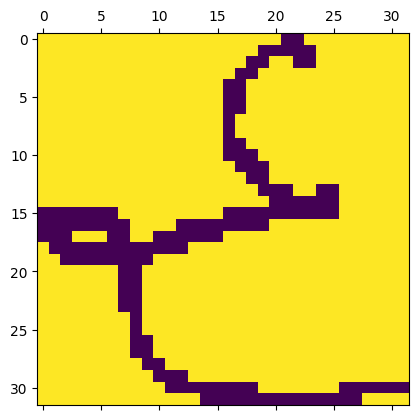

In [ ]:
# Adding more layer in model 
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, input_shape=(1024,), activation='sigmoid'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )


# scaling the data by dividing dataset by 255 ti improve accurancy
image_train_scaled = image_train/255
image_test_scaled = image_test/255
# Increased patiece value 5 and  epochs to 20 ffor eaarly stopping call backs
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history2 = model.fit(image_train_scaled, label_train, epochs=20, validation_data=(image_test_scaled, label_test), callbacks=[early_stopping_callback])
plot_accuracy_loss(history2)

# evaluate test dataset
model.evaluate(image_test_scaled,label_test)



# predict 1st image
plt.matshow(image_test[0])
number_predicted = model.predict(image_test_scaled)
number_predicted[4]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(number_predicted[4]))
# test some more values
plt.matshow(image_test[88])
print('Predicted Value is ',np.argmax(number_predicted[88]))
plt.matshow(image_test[177])
print('Predicted Value is ',np.argmax(number_predicted[177]))